In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# загружаем датасет через pandas
data = pd.read_csv('credit_train.csv')

In [3]:
data.shape

(58645, 13)

In [4]:
data.sample(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
25466,25466,21,36000,RENT,5.0,MEDICAL,A,5000,7.51,0.14,N,2,0
21795,21795,22,95000,MORTGAGE,5.0,DEBTCONSOLIDATION,A,5000,6.76,0.05,N,4,0
54500,54500,25,48000,RENT,9.0,PERSONAL,A,1800,7.29,0.04,N,3,0
54465,54465,26,84191,MORTGAGE,5.0,PERSONAL,A,9000,6.62,0.11,N,9,0
3784,3784,23,49000,RENT,5.0,DEBTCONSOLIDATION,D,3000,14.11,0.06,N,4,1


Сначала изучим данные, посмотрим на столбцы и пропуски

In [5]:
data.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


In [8]:
data.isna().sum()
# пропущенных значений нет

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
data.isnull().sum()
# нулей тоже нет

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [10]:
# избавляемся от колонки id, чтобы избежать переобучения
data.drop('id', axis = 1, inplace = True)
data.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0


In [11]:
numeric_cols = data.select_dtypes(include=['number'])
numeric_cols

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,37,35000,0.0,6000,11.49,0.17,14,0
1,22,56000,6.0,4000,13.35,0.07,2,0
2,29,28800,8.0,6000,8.90,0.21,10,0
3,30,70000,14.0,12000,11.11,0.17,5,0
4,22,60000,2.0,6000,6.92,0.10,3,0
...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,10,0
58641,28,28800,0.0,10000,12.73,0.35,8,1
58642,23,44000,7.0,6800,16.00,0.15,2,1
58643,22,30000,2.0,5000,8.90,0.17,3,0


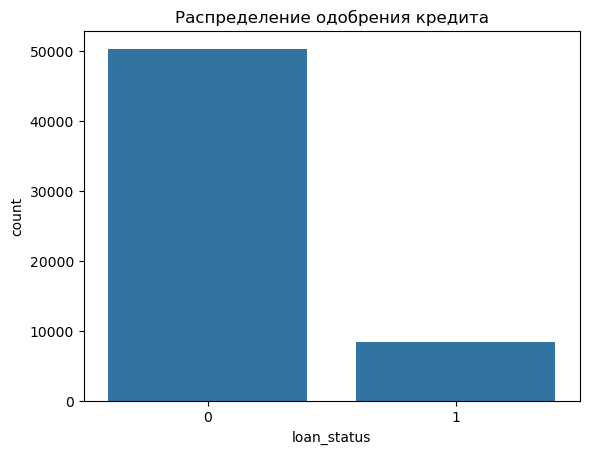

In [12]:
# Visualizing the distribution of the target variable 'loan_status'
ax = sns.countplot(x=data["loan_status"])
plt.title("Распределение одобрения кредита")

    
plt.show()

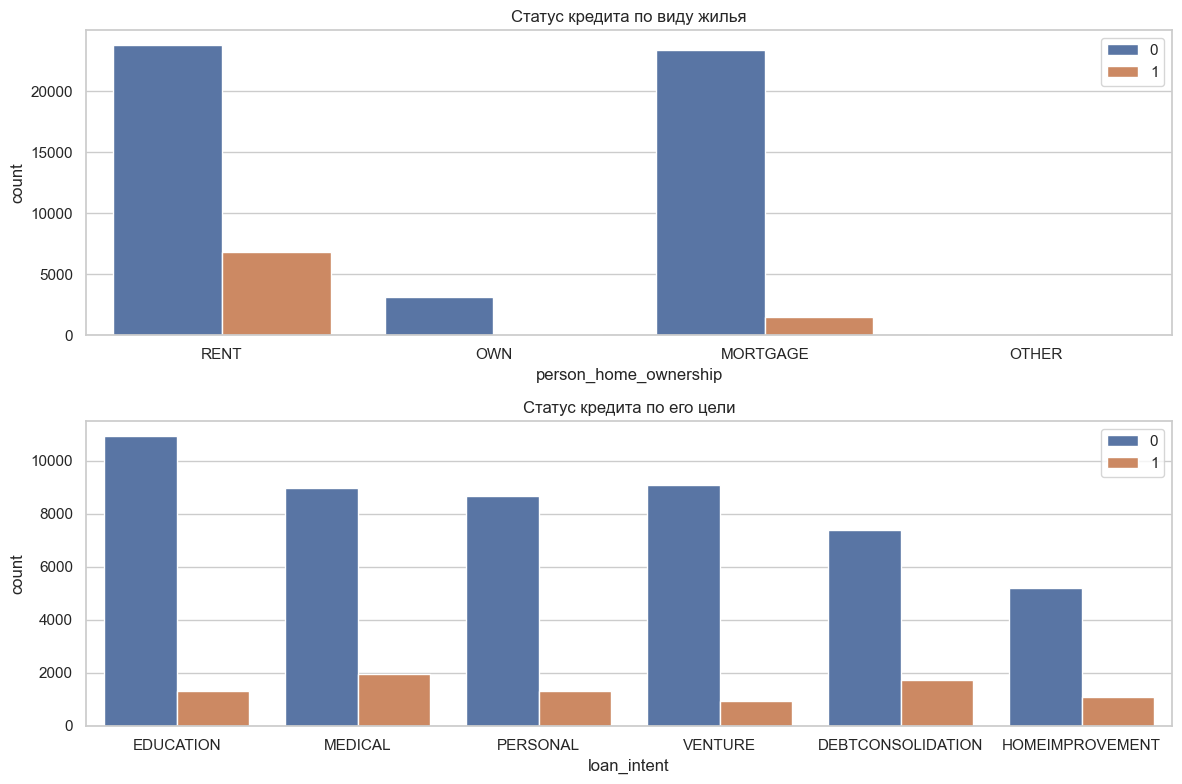

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))  # ширина и высота в дюймах

plt.subplot(2, 1, 1)
sns.countplot(data=data, x='person_home_ownership', hue='loan_status') # смотрим распределение по 
plt.title("Статус кредита по виду жилья")
plt.legend()


plt.subplot(2, 1, 2)
sns.countplot(data=data, x='loan_intent', hue='loan_status')
plt.title("Статус кредита по его цели") 
plt.legend()

# Чтобы графики друг на друга не наезжали
plt.tight_layout()
plt.show()

In [14]:
# Распределение целевой переменной
print("Распределение целевой переменной:")
print(data['loan_status'].value_counts(normalize=True))

Распределение целевой переменной:
loan_status
0    0.857618
1    0.142382
Name: proportion, dtype: float64


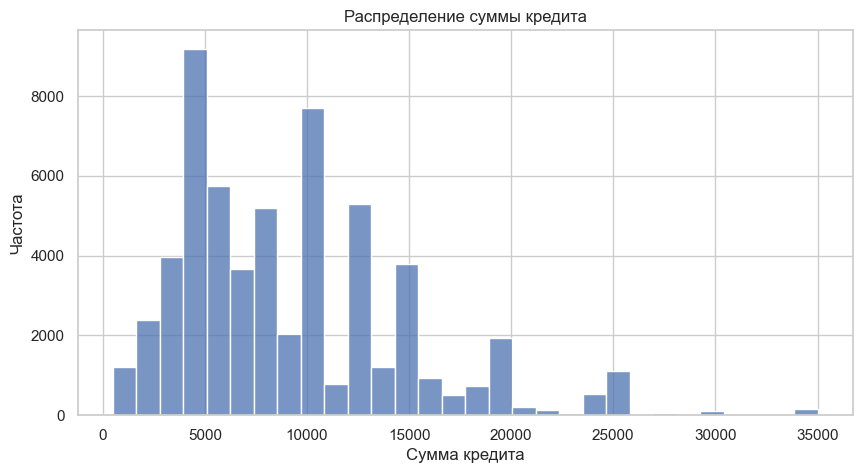

In [15]:
# Посмотрим распределение по сумме кредита
plt.figure(figsize=(10, 5))
sns.histplot(data['loan_amnt'], bins=30)
plt.title('Распределение суммы кредита')
plt.xlabel('Сумма кредита')
plt.ylabel('Частота')
plt.show()

Видно, что больше всего берут кредиты на 5000 долларов, на более значительные суммы берут реже

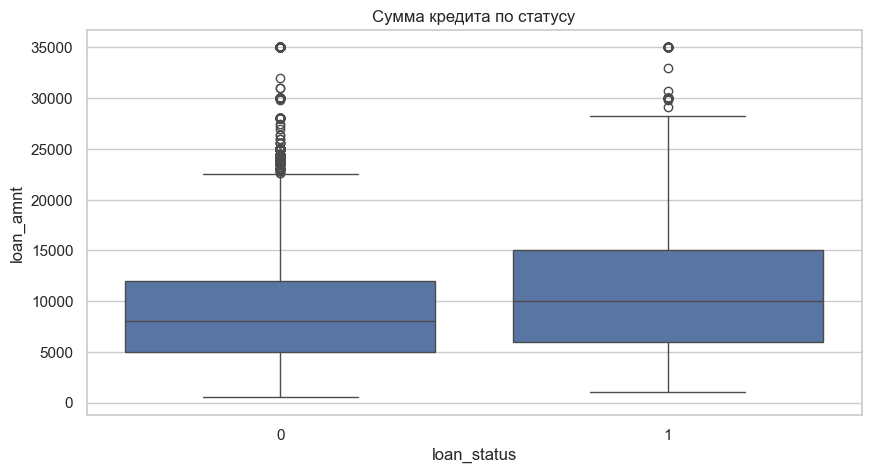

In [16]:
# Строим box-plot для поиска выбросов (loan_amount vs loan_status)
plt.figure(figsize=(10, 5))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Сумма кредита по статусу')
plt.show()

Из графика видно, что средняя сумма одобренных кредитов 10000 долларов, большие займы выдаются крайне редко, более относятся к выбрсамм

In [2]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached optree-0.14

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [18]:
data_test = pd.read_csv('credit_test.csv')

In [ ]:
# преобразовываем категориальные признаки в числовые
le = LabelEncoder()
categoricals = data.select_dtypes(include=['object']).columns
for col in categoricals:
        data[col] = le.fit_transform(data[col])
        data_test[col] = le.transform(data_test[col])  # Применяем тот же encoder к тесту


In [21]:
# делим выборку на тестовую и тренировочную
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [23]:

# как всегда делим на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# масштабируем числовые признаки через Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(data_test.drop('id', axis=1))  # тестовую тоже, id из него тоже удаляем

In [24]:
# построение многослойной модельки
# (MLP)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Входной слой
    Dense(64, activation='relu'),  # Скрытый слой 1
    Dense(32, activation='relu'),  # Скрытый слой 2
    Dense(1, activation='sigmoid')  # Выходной слой (бинарная классификация)
])


In [ ]:
# компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
# Обновление весов берем Адам, метрика - accuracy, оптимизируем кросс энтропию, потому что у нас тут бинарная классификация (1 или 0)
# Дали кредит или нет


In [ ]:
# у нас модель выглядит так: 3 слоя,  на каждом размерность понижается, чтобы не было переобучения
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:

# гиперпараметры: 50 эпох, batch_size=32
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9546 - loss: 0.1425 - val_accuracy: 0.9440 - val_loss: 0.2006
Epoch 2/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9562 - loss: 0.1386 - val_accuracy: 0.9448 - val_loss: 0.2031
Epoch 3/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9571 - loss: 0.1345 - val_accuracy: 0.9446 - val_loss: 0.2036
Epoch 4/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9572 - loss: 0.1327 - val_accuracy: 0.9421 - val_loss: 0.2087
Epoch 5/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9547 - loss: 0.1400 - val_accuracy: 0.9448 - val_loss: 0.2099
Epoch 6/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9559 - loss: 0.1391 - val_accuracy: 0.9419 - val_loss: 0.2182
Epoch 7/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9575 - loss: 0.1334 - val_accuracy: 0.9432 - val_loss: 0.2141
Epoch 8/30
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9563 - loss: 0.1359 - 

In [30]:
# предсказываем вероятности на валидационной выборке
y_val_pred_proba = model.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


In [31]:
# смотрим на метрики
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
accuracy = roc_auc_score(y_val, y_val_pred)  # сравниваем acuracy, но основная метрика - ROC-AUC
print(f"\nROC-AUC на валидации: {roc_auc:.4f}")
print(f"Accuracy на валидации: {accuracy:.4f}")


ROC-AUC на валидации: 0.8963
Accuracy на валидации: 0.8393


Это достаточно большие значения, значит модель не переобучилась и может обощать достаточно хорошо

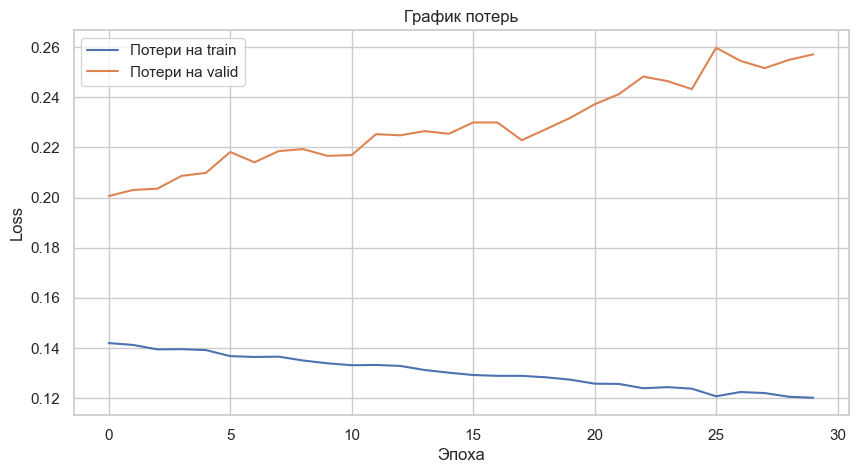

In [43]:
# построим графики обучения
plt.figure(figsize=(10, 5))

# график потерь
plt.plot(history.history['loss'], label='Потери на train')
plt.plot(history.history['val_loss'], label='Потери на valid')
plt.title('График потерь')
plt.xlabel('Эпоха')
plt.ylabel('Loss')
plt.legend()
plt.show()



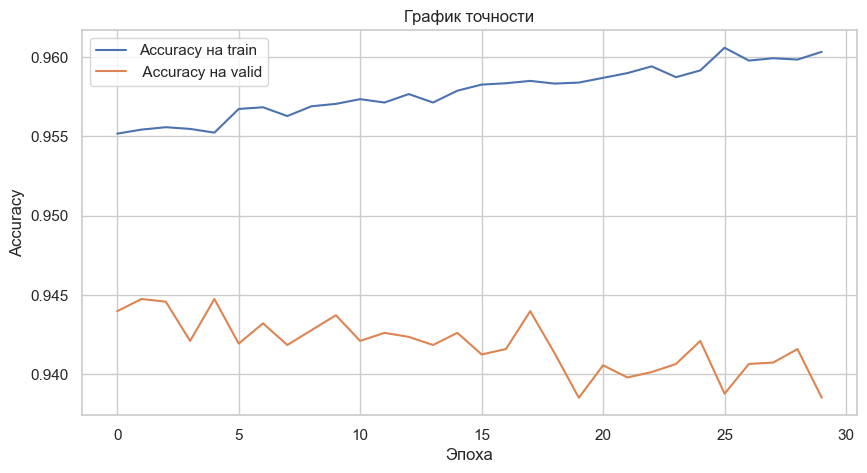

In [45]:
plt.figure(figsize=(10, 5))
# как менялась точность с обучением
plt.plot(history.history['accuracy'], label='Accuracy на train')
plt.plot(history.history['val_accuracy'], label=' Accuracy на valid')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
# Предсказание  для submission
test_pred_proba = model.predict(X_test)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step


In [47]:
# чтобы сохранился файл csv сразу
submission = pd.DataFrame({'id': data_test['id'], 'loan_status': test_pred_proba.flatten()})
submission.to_csv('submission.csv', index=False)